## Drivers of PE-Score 
#### Figure 5-6, Appendix I

In [1]:
dir_path = '/Users/jeremyzyang/Library/CloudStorage/GoogleDrive-jeremy.z.yang@gmail.com/My Drive/tiktok_revision'
setwd(dir_path)

In [2]:
load('tiktok.RData')
options(warn = -1)

In [3]:
suppressWarnings(suppressMessages(library(data.table)))
suppressWarnings(suppressMessages(library(tidyverse)))
suppressWarnings(suppressMessages(library(lfe)))
suppressWarnings(suppressMessages(library(patchwork)))
suppressWarnings(suppressMessages(library(zoo)))
suppressWarnings(suppressMessages(library(doParallel)))
suppressWarnings(suppressMessages(library(staggered)))
suppressWarnings(suppressMessages(library(fixest)))
suppressWarnings(suppressMessages(library(faux)))
suppressWarnings(suppressMessages(library(stargazer)))
suppressWarnings(suppressMessages(library(xgboost)))
suppressWarnings(suppressMessages(library(caret)))

In [4]:
suppressWarnings(suppressMessages(library(quanteda)))
suppressWarnings(suppressMessages(library(topicmodels)))
suppressWarnings(suppressMessages(library(ldatuning)))
suppressWarnings(suppressMessages(library(stm)))
suppressWarnings(suppressMessages(library(wordcloud)))

In [5]:
sessionInfo()

R version 4.2.1 (2022-06-23)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Big Sur ... 10.16

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.2/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.2/Resources/lib/libRlapack.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] parallel  stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] wordcloud_2.6      RColorBrewer_1.1-3 stm_1.3.6          ldatuning_1.0.2   
 [5] topicmodels_0.2-14 quanteda_3.3.1     caret_6.0-93       lattice_0.20-45   
 [9] xgboost_1.6.0.1    stargazer_5.2.3    faux_1.1.0         fixest_0.10.4     
[13] staggered_1.1      doParallel_1.0.17  iterators_1.0.14   foreach_1.5.2     
[17] zoo_1.8-11         patchwork_1.1.2    lfe_2.8-8          Matrix_1.5-1      
[21] forcats_0.5.2      stringr_1.4.1      dplyr_1.0.10       purrr_0.3.4   

In [6]:
ls()

[1] "activity"           "dir_path"           "e_space"           
 [4] "e_time"             "emotion"            "loss"              
 [7] "model_construction" "model_evaluation"   "object"            
[10] "own"                "p_space"            "p_time"            
[13] "pe_space"           "pe_time"            "search"

#### Figure 5

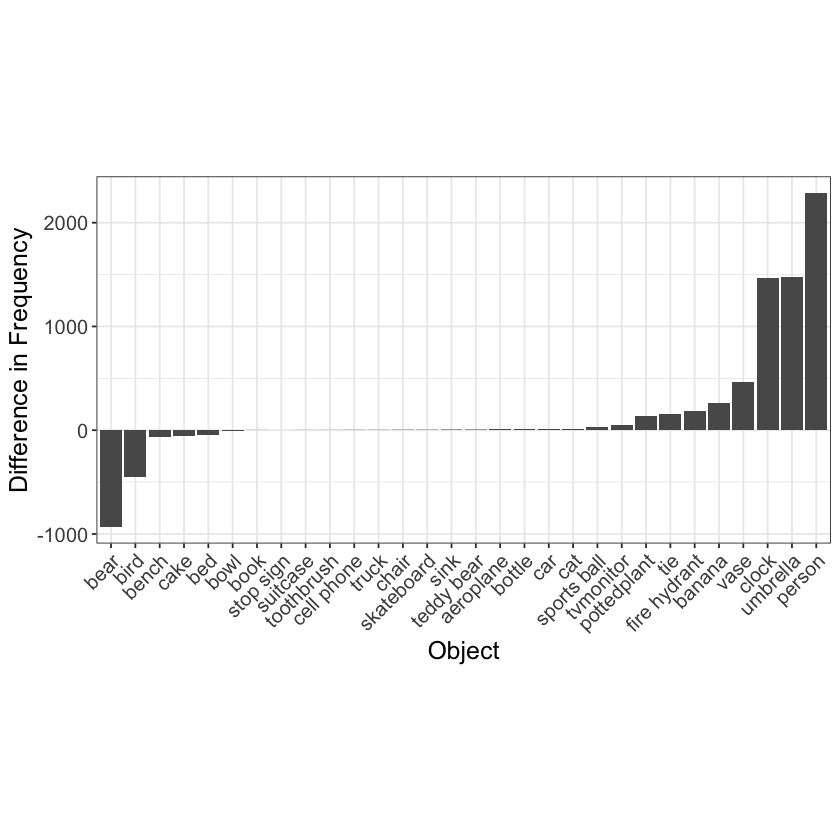

In [7]:
ggplot(object, 
       aes(reorder(object, count_diff), count_diff)) + geom_bar(stat = 'identity') + theme_bw() + 
theme(text = element_text(size=15)) +
xlab('Object') + ylab('Difference in Frequency') +
theme(aspect.ratio=2/4) + 
theme(axis.text.x=element_text(angle=45, hjust=1))

#### Figure 6

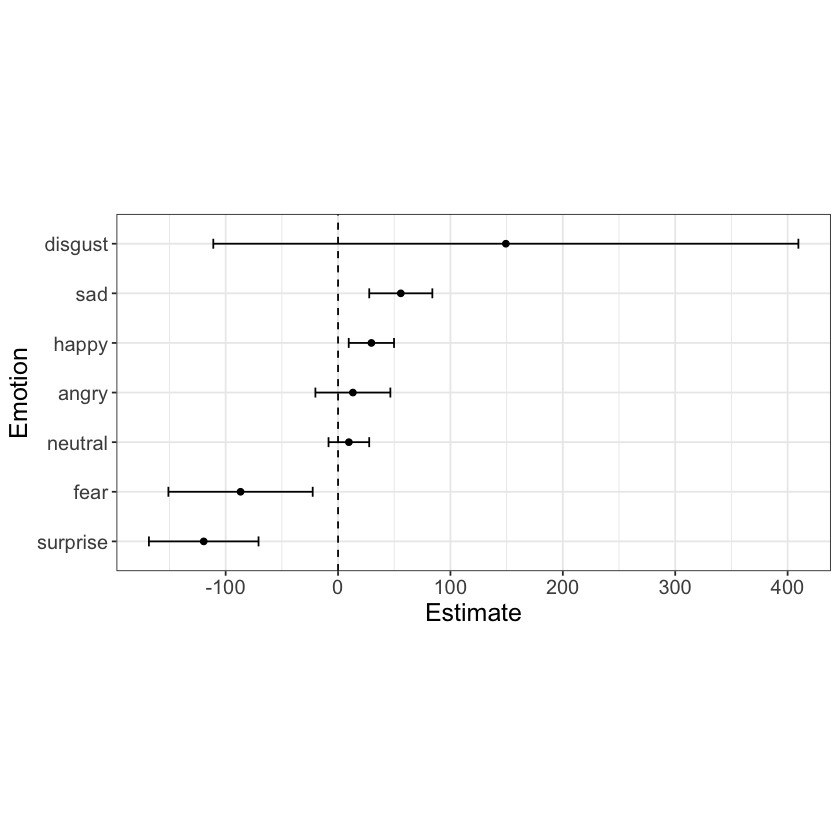

In [8]:
model = lm(enga_score ~ (angry + disgust + fear + happy + neutral + sad + surprise) + time,
          emotion)

e = data.frame(summary(model)$coef)
e$emotion = row.names(e)
e = e[-c(1,9),]

ggplot(e, aes(reorder(emotion, Estimate), Estimate)) +
geom_point() + 
geom_errorbar(aes(ymin = Estimate - 1.96*Std..Error, ymax = Estimate + 1.96*Std..Error), width = 0.2) +
theme_bw() + coord_flip() + 
xlab('Emotion') + 
theme(text = element_text(size=15)) + 
geom_hline(yintercept=0, linetype = 'dashed') +
scale_y_continuous(breaks=seq(-200, 500, 100)) +
theme(aspect.ratio=2/4)

#### Appendix I: Figure I.1

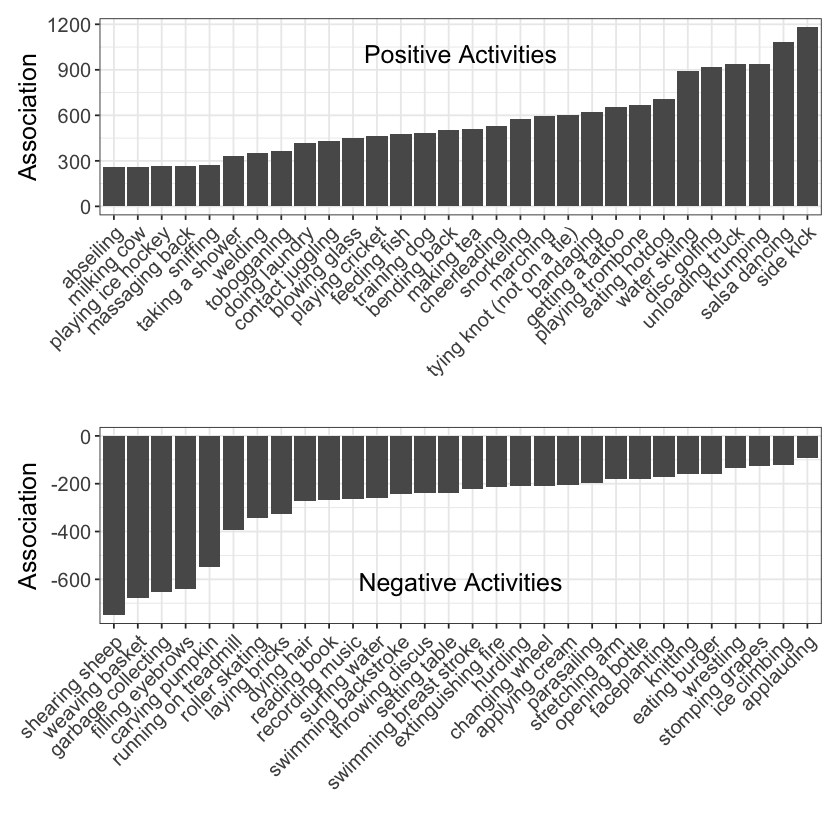

In [9]:
ggplot(filter(activity, Estimate > 0) %>% 
       arrange(Estimate) %>%
       top_n(30, Estimate), 
       aes(reorder(act, Estimate), Estimate)) + 
geom_bar(stat = 'identity') + theme_bw() + 
xlab('Positive Activities') + 
ylab('Association') +
theme(text = element_text(size=15)) + 
theme(axis.title.x = element_text(vjust=63)) +
theme(axis.text.x=element_text(angle=45, hjust=1)) +

ggplot(filter(activity, Estimate < 0) %>% 
       arrange(Estimate) %>%
       top_n(-30, Estimate), 
       aes(reorder(act, Estimate), Estimate)) + 
geom_bar(stat = 'identity') + theme_bw() + 
xlab('Negative Activities') + 
ylab('Association') +
theme(text = element_text(size=15)) +
theme(axis.text.x=element_text(angle=45, hjust=1)) + 
theme(axis.title.x = element_text(vjust=42)) +
plot_layout(ncol = 1)

#### Appendix I: Table I.1

In [10]:
n_topics = 2

# positive activities

text = activity %>% filter(Estimate > 0) %>% pull(act)
text <- tokens(text) %>% tokens_wordstem

dfm = dfm(text, remove_numbers = T, remove_punct = T, remove_symbols = T, remove = stopwords("english"))
model = LDA(convert(dfm, to = "topicmodels"), n_topics, control = list(seed = 101))

as.data.frame(terms(model, 10)) %>% stargazer(type='text', summary=F)


    Topic 1  Topic 2
--------------------
1    play     play  
2    danc     make  
3    make     clean 
4    clean    climb 
5     use      ice  
6    back     blow  
7  basketbal   car  
8    fold      eat  
9     eat     floor 
10   push     head  
--------------------


In [11]:
# negative activities

text = activity %>% filter(Estimate < 0) %>% pull(act)
text <- tokens(text) %>% tokens_wordstem

dfm = dfm(text, remove_numbers = T, remove_punct = T, remove_symbols = T, remove = stopwords("english"))
model = LDA(convert(dfm, to = "topicmodels"), n_topics, control = list(seed = 101))

as.data.frame(terms(model, 10)) %>% stargazer(type='text', summary=F)


   Topic 1  Topic 2
-------------------
1    swim    appli 
2   paper    paper 
3  question  fill  
4    tabl    swim  
5    fli      run  
6    feed   stretch
7    die      leg  
8   basket    wax  
9  monopoli facepl 
10  bottl    book  
-------------------
